In [ ]:
"""The Poisson equation"""

__author__    = "Magnar Bjørgve"
__credit__    = ["Magnar Bjørgve"]

__date__      = "2021-02-16"

# The Poisson equation


A useful equation to solve is the Poisson equation, which among other places appear
when we wish to figure out the electrostatic potentail $V$ from the electronic density $\rho$.


The Poisson equation is usually written in its differential form 
\begin{align}
    \nabla^2 g(r) = -f(r)
\end{align}

The solution can be written in terms of the convolution integral 

\begin{align}
    g(r) = \int P(r - r') \, d r'= \hat{P}[f](r)
\end{align}
where $P(r)$ is the Poisson kernel 
\begin{align}
    P(r) = \frac{1}{4 \pi r}
\end{align}
and $\hat{P}$ is the Poisson Operator.


Next we'll use VAMPyR to sovle the Poisson equation. We'll do this through what is called a source test.
That is, we'll start by defining an analytic funtion $g$, or solution, then fabricate $f$ from this.
We then use VAMPyR and solve the Poisson equation by applying poisson operator onto $f$

Assume
\begin{align}
    g(r) = \exp(-x^2 - y^2 - z^2)
\end{align}
we then apply the laplace operator $\nabla^2$ onto $g$ and we get $f$ to be 
\begin{align}
    f(r) = -\nabla^2 g(r) = - 2(2x^2 + 2y^2 + 2z^2 + 3) \exp(-x^2 - y^2 - z^2)
\end{align}


In [1]:
# The Poisson operator is a 3 dimensional operator so we use vampyr3d
from vampyr import vampyr3d as vp3
import numpy as np

import matplotlib.pyplot as plt

# Set the precision and make the MRA
prec = 1.0e-3
mra = vp3.MultiResolutionAnalysis(box=[-20, 20], order=5)

# Make the scaling projector
P_eps = vp3.ScalingProjector(mra, prec)

# Make the Poisson operator
poisson_operator = vp3.PoissonOperator(mra, prec)

# Define the analytical source term f
def f(x):
    return -2.0*(2.0*x[0]**2 + 2.0*x[1]**2 + 2.0*x[2]**2 - 3.0) * np.exp(-x[0]**2 - x[1]**2 - x[2]**2)

# Define the analytical solution reference g
def g(x):
    return np.exp(-x[0]**2 - x[1]**2 - x[2]**2)

f_tree = P_eps(f)
g_tree_analytic = P_eps(g)

# Apply the PoissonOperator onto f_tree
g_tree = poisson_operator(f_tree)

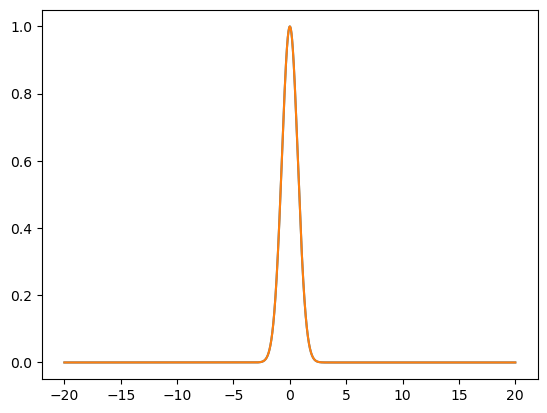

In [2]:
# One way to compare g_tree to the analytical reference is to plot them together

x = np.arange(-20, 20, 0.001)
y = [g_tree([_, 0.0, 0.0]) for _ in x]
y1= [g([_, 0.0, 0.0]) for _ in x]

plt.plot(x, y)
plt.plot(x, y1)
plt.show()

# An exercise is to modify the code and plot the relative difference along the same line

In [3]:
# A problem with that comparrison is that we only see a line in 3D space. Another
# purhaps better way to compare the accuray of g_tree and g is to project g onto
# a function_tree g_tree_reference. Then calcualte the norm of g_tree - g_tree_reference

# An exercise is to see how the square norm decreases when the precision is increased.

g_tree_reference = P_eps(g)

print("g_tree - g_tree_reference square norm:", (g_tree - g_tree_reference).norm())

g_tree - g_tree_reference square norm: 0.0004611916258279639
